In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [14]:
ls_df = pd.DataFrame()


In [15]:
radius = 10.0

xs = []
ys = []
zs = []
for i in range(110):
    xs.append(radius * math.cos(i*math.pi / 50.0))
    ys.append(radius * math.sin(i*math.pi / 50.0))
    zs.append(0.0)    



ls_df["x"] = xs
ls_df["y"] = ys
ls_df["z"] = zs

temp = ls_df.shift(-1)
temp.iloc[-1] = temp.iloc[0]

ls_df["next_x"] = temp["x"]
ls_df["next_y"] = temp["y"]
ls_df["next_z"] = temp["z"]

ls_df["dist_to_next"] = ls_df.apply(lambda x: math.sqrt((x["x"] - x["next_x"])**2 + (x["y"] - x["next_y"])**2), axis=1)
ls_df["uv_to_next"] = ls_df.apply(lambda x: np.array([(x["next_x"] - x["x"])/x["dist_to_next"], (x["next_y"] - x["y"])/x["dist_to_next"]]), axis=1)
ls_df["step_to_next"] = ls_df.apply(lambda x: np.array([x["next_x"] - x["x"], x["next_y"] - x["y"]]), axis=1)
ls_df["bearing_to_next"] = ls_df.apply(lambda x: math.atan2(x["next_y"] - x["y"], x["next_x"] - x["x"]), axis=1)

ls_df["cum_distance"] = ls_df["dist_to_next"].cumsum()

ls_df

,x,y,z,next_x,next_y,next_z,dist_to_next,uv_to_next,step_to_next,bearing_to_next,cum_distance
0,10.000000,0.000000,0.0,9.980267,0.627905,0.0,0.628215,"[-0.03141075907812764, 0.9995065603657315]","[-0.019732715717283966, 0.6279051952931337]",1.602212,0.628215
1,9.980267,0.627905,0.0,9.921147,1.253332,0.0,0.628215,"[-0.09410831331851388, 0.99556196460308]","[-0.05912027113793705, 0.6254271403499089]",1.665044,1.256430
2,9.921147,1.253332,0.0,9.822873,1.873813,0.0,0.628215,"[-0.15643446504023242, 0.9876883405951374]","[-0.09827450585789244, 0.6204808102142034]",1.727876,1.884646
3,9.822873,1.873813,0.0,9.685832,2.486899,0.0,0.628215,"[-0.21814324139654265, 0.9759167619387473]","[-0.13704089600057578, 0.613085725791302]",1.790708,2.512861
4,9.685832,2.486899,0.0,9.510565,3.090170,0.0,0.628215,"[-0.27899110603923033, 0.9602936856769427]","[-0.17526644833477611, 0.603271072100926]",1.853540,3.141076
...,...,...,...,...,...,...,...,...,...,...,...
105,9.510565,3.090170,0.0,9.297765,3.681246,0.0,0.628215,"[-0.3387379202452921, 0.9408807689542253]","[-0.21280030406902384, 0.59107558309731]",1.916372,66.590809
106,9.297765,3.681246,0.0,9.048271,4.257793,0.0,0.628215,"[-0.39714789063477884, 0.9177546256839819]","[-0.24949433422231593, 0.5765473888039434]",1.979203,67.219024
107,9.048271,4.257793,0.0,8.763067,4.817537,0.0,0.628215,"[-0.4539904997395474, 0.8910065241883677]","[-0.2852037242215584, 0.5597438253664233]",2.042035,67.847240
108,8.763067,4.817537,0.0,8.443279,5.358268,0.0,0.628215,"[-0.5090414157503708, 0.8607420270039439]","[-0.31978754541848353, 0.5407312087728116]",2.104867,68.475455


In [16]:
# set up the edges of the track
track_width = 20.0
half_width = track_width / 2.0

ls_df["inner_x"] = ls_df.apply(lambda x: x["x"] - half_width * x["uv_to_next"][1], axis=1)
ls_df["inner_y"] = ls_df.apply(lambda x: x["y"] + half_width * x["uv_to_next"][0], axis=1)
ls_df["outer_x"] = ls_df.apply(lambda x: x["x"] + half_width * x["uv_to_next"][1], axis=1)
ls_df["outer_y"] = ls_df.apply(lambda x: x["y"] - half_width * x["uv_to_next"][0], axis=1)

ls_df.drop(index=ls_df.index[-1], 
           axis=0, 
           inplace=True)
ls_df

,x,y,z,next_x,next_y,next_z,dist_to_next,uv_to_next,step_to_next,bearing_to_next,cum_distance,inner_x,inner_y,outer_x,outer_y
0,10.000000,0.000000,0.0,9.980267,0.627905,0.0,0.628215,"[-0.03141075907812764, 0.9995065603657315]","[-0.019732715717283966, 0.6279051952931337]",1.602212,0.628215,0.004934,-0.314108,19.995066,0.314108
1,9.980267,0.627905,0.0,9.921147,1.253332,0.0,0.628215,"[-0.09410831331851388, 0.99556196460308]","[-0.05912027113793705, 0.6254271403499089]",1.665044,1.256430,0.024648,-0.313178,19.935887,1.568988
2,9.921147,1.253332,0.0,9.822873,1.873813,0.0,0.628215,"[-0.15643446504023242, 0.9876883405951374]","[-0.09827450585789244, 0.6204808102142034]",1.727876,1.884646,0.044264,-0.311012,19.798030,2.817677
3,9.822873,1.873813,0.0,9.685832,2.486899,0.0,0.628215,"[-0.21814324139654265, 0.9759167619387473]","[-0.13704089600057578, 0.613085725791302]",1.790708,2.512861,0.063705,-0.307619,19.582040,4.055246
4,9.685832,2.486899,0.0,9.510565,3.090170,0.0,0.628215,"[-0.27899110603923033, 0.9602936856769427]","[-0.17526644833477611, 0.603271072100926]",1.853540,3.141076,0.082895,-0.303012,19.288768,5.276810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,9.685832,2.486899,0.0,9.510565,3.090170,0.0,0.628215,"[-0.27899110603922905, 0.9602936856769431]","[-0.17526644833477434, 0.6032710721009229]",1.853540,65.962594,0.082895,-0.303012,19.288768,5.276810
105,9.510565,3.090170,0.0,9.297765,3.681246,0.0,0.628215,"[-0.3387379202452921, 0.9408807689542253]","[-0.21280030406902384, 0.59107558309731]",1.916372,66.590809,0.101757,-0.297209,18.919373,6.477549
106,9.297765,3.681246,0.0,9.048271,4.257793,0.0,0.628215,"[-0.39714789063477884, 0.9177546256839819]","[-0.24949433422231593, 0.5765473888039434]",1.979203,67.219024,0.120219,-0.290233,18.475311,7.652724
107,9.048271,4.257793,0.0,8.763067,4.817537,0.0,0.628215,"[-0.4539904997395474, 0.8910065241883677]","[-0.2852037242215584, 0.5597438253664233]",2.042035,67.847240,0.138205,-0.282112,17.958336,8.797698


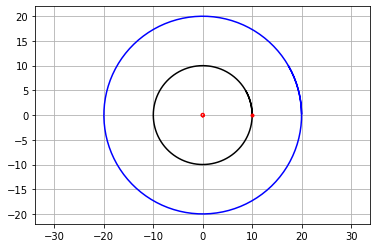

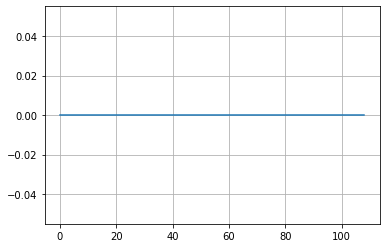

In [17]:
plt.plot(ls_df["x"], ls_df["y"], 'k')
plt.plot(ls_df["x"][0], ls_df["y"][0], 'r.')
plt.plot(ls_df["inner_x"], ls_df["inner_y"], 'r')
plt.plot(ls_df["outer_x"], ls_df["outer_y"], 'b')


plt.axis('equal')
plt.grid()
plt.show()

plt.plot(ls_df["z"])
plt.grid()

In [18]:
out_df = pd.DataFrame()
out_df["x"] = ls_df["x"] - ls_df["x"][0]
out_df["y"] = ls_df["y"] - ls_df["y"][0]
out_df["z"] = ls_df["z"] - ls_df["z"][0]
out_df["xn"] = ls_df["next_x"] - ls_df["x"][0]
out_df["yn"] = ls_df["next_y"] - ls_df["y"][0]
out_df["zn"] = ls_df["next_z"] - ls_df["z"][0]
out_df['heading'] = ls_df['bearing_to_next']
out_df["dist"] = ls_df["dist_to_next"]
out_df["uv"] = ls_df["uv_to_next"]
out_df["cum_dist"] = ls_df["cum_distance"] - ls_df["cum_distance"][0]
out_df["inner_x"] = ls_df["inner_x"] - ls_df["x"][0]
out_df["inner_y"] = ls_df["inner_y"] - ls_df["y"][0]
out_df["outer_x"] = ls_df["outer_x"] - ls_df["x"][0]
out_df["outer_y"] = ls_df["outer_y"] - ls_df["y"][0]


out_df.to_csv("C:/Users/sgtas/Desktop/autonomous_car/test_circle_" + str(radius) + "_radius.csv", index=False)